# 0.) Import and Clean data

In [29]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [31]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [32]:

df = pd.read_csv("/content/gdrive/MyDrive/Econ 441B/Country-data.csv")

In [33]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [34]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [35]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [36]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [37]:
kmeans = KMeans(n_clusters= 2
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [38]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

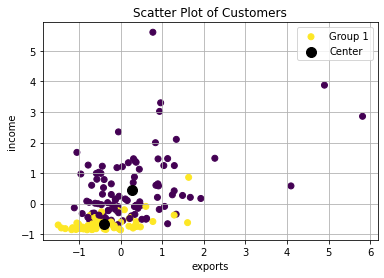

In [39]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 1
x2_index = 4


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [40]:
WCSS = []
Ks = range(1,15)
for k in Ks:
  kmeans = KMeans(n_clusters = k, n_init = 30)
  kmeans.fit(X_scaled)
  WCSS.append(kmeans.inertia_)

In [41]:
#get Inertia
WCSSs = [KMeans(n_clusters = k, n_init = 30).fit(X_scaled).inertia_ for k in range(1, 15)]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

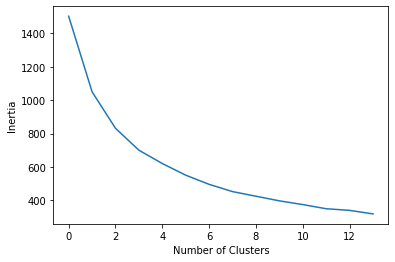

In [42]:
plt.plot(WCSSs)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [43]:
#choosing number of clusters:
#Based on the plot, we can see that the rate of decrease in WCSS starts to level off after around k=4, so we can choose 4 clusters for our model.

In [59]:
k = 4

In [60]:
kmeans = KMeans(n_clusters = k).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [61]:
preds = pd.DataFrame(kmeans.predict(X_scaled))
#this gives us cluster 1 and 0 -- in order of our data -- which one to use 

In [62]:
output = pd.concat([preds,names], axis = 1)

In [63]:
print("Cluster 1 : ")
list(output[output[0] == 0]['country'])

Cluster 1 : 


['Afghanistan',
 'Angola',
 'Benin',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [66]:
### interesting list of countries

# 1) The countries in  cluster 1 are spread across multiple continents. Maybe some commonalities in economic, social, or political factors?
# 2) Many countries in  cluster 1 are developing economies. Maybe because they share similar challenges related to poverty, or education? 
# 3) Notable omissions from cluster 1 -- ie the United States, Canada, and most of Europe. Maybe these countries have social/economic factors that differ from the countries in cluster 1

In [67]:
# Showing cluster 2 if you want

#print("Cluster 2 : ")
#list(output[output[0] == 1]['country'])

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [68]:
#rows to be cluster numbers

In [69]:
Q6DF = pd.concat([preds,X], axis = 1)
#don't have to unscale all X variables to interpret this -- very nice

In [70]:
Q6DF.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,93.841304,28.837174,6.346957,42.128261,3738.978261,12.087065,59.232609,5.054348,1826.130435
1,21.743182,41.316920,6.259318,48.075749,12972.386364,7.430580,72.755682,2.293295,6912.636364
2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
3,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333


In [71]:
Q6DF.groupby(0).std()



,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,33.188663,18.231737,2.675974,17.877592,5527.110061,15.674386,6.507126,1.002871,2913.353765
1,14.136313,19.412163,2.157549,19.970637,8819.321004,7.764821,4.272361,0.695263,5422.836621
2,2.309401,23.515952,2.492877,16.165808,32460.642836,2.179718,1.205543,0.240624,43011.665084
3,2.159140,21.736255,3.266299,17.455134,19785.308900,4.266366,1.440231,0.369293,15040.114942


# Q7.) Write an observation about the descriptive statistics.

In [72]:
#cluster 1 has low  inflation and high life expecetancy
#cluster 2 has high inflation and lower life expectancy